## Description about Data
Row ID: A unique identifier for each row in the dataset (for indexing)

Order ID: Unique code for each order placed.

Order Date: Date when the order was placed.

Ship Date: Date when the order was shipped.

Ship Mode: Shipping method used (e.g., First Class, Standard Class).

Customer ID: Unique ID for each customer.

Customer Name: Name of the customer who placed the order.

Segment: Market segment of the customer (e.g., Consumer, Corporate).

Country: Country where the customer is located.

City: City of the customer.

State: State or province of the customer.

Postal Code: ZIP or postal code of the customer.

Region: Geographical region (e.g., West, East).

Product ID: Unique ID for each product.

Category: Main category of the product (e.g., Furniture).

Sub-Category: Specific type within the category (e.g., Chairs).

Product Name: Name or description of the product.

Sales: Total sales amount for the item.

Quantity: Number of units sold.

Discount: Discount applied (e.g., 0.2 = 20%).

Profit: Profit made from the sale.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import yaml
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')


In [2]:
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
import os
os.chdir('..')
print(os.getcwd())

e:\Videos\My courses\DEPI\Final Project


In [4]:
with open('configs/paths.yaml','r') as f:
    config = yaml.safe_load(f)

config_paths=config['paths']
config_dir = config['dir']

In [5]:
df = pd.read_csv(config_paths['raw_data_path'], encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
# Change data type for "Order Data" , "ship Date" to DateTime
df['Order Date'] = pd.to_datetime(df['Order Date'],format="%d-%m-%Y")
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format="%d-%m-%Y")

In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2013-04-30 19:20:02.401441024,2013-05-04 18:20:49.229537792,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2011-01-04 00:00:00,2011-01-08 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2012-05-23 00:00:00,2012-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2013-06-27 00:00:00,2013-06-30 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2014-05-15 00:00:00,2014-05-19 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2014-12-31 00:00:00,2015-01-06 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [10]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

NO NULL VALUES

In [11]:
# Check for Duplicated values
print(df.duplicated().sum())

0


In [12]:
df.nunique().sort_values(ascending=False)

Row ID           9994
Profit           7287
Sales            5825
Order ID         5009
Product ID       1862
Product Name     1841
Ship Date        1334
Order Date       1238
Customer ID       793
Customer Name     793
Postal Code       631
City              531
State              49
Sub-Category       17
Quantity           14
Discount           12
Region              4
Ship Mode           4
Category            3
Segment             3
Country             1
dtype: int64

In [7]:
data = df.copy()

In [69]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')

All data from United States we add column holidays in US

outliers


# Exploratory Data analysis (EDA)

In [13]:
# Display number of unique values in each categorical column
no_unique_value =data.nunique().sort_values(ascending=False)

# Printing categorical data that has a unique value less than 20 unique value
cat_data = data.nunique()[no_unique_value<20]
for x in cat_data.index:
  print(x)
  print(data[x].unique())
  print("------------------------------------------")

Ship Mode
['Second Class' 'Standard Class' 'First Class' 'Same Day']
------------------------------------------
Segment
['Consumer' 'Corporate' 'Home Office']
------------------------------------------
Country
['United States']
------------------------------------------
Region
['South' 'West' 'Central' 'East']
------------------------------------------
Category
['Furniture' 'Office Supplies' 'Technology']
------------------------------------------
Sub-Category
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
------------------------------------------
Quantity
[ 2  3  5  7  4  6  9  1  8 14 11 13 10 12]
------------------------------------------
Discount
[0.   0.45 0.2  0.8  0.3  0.5  0.7  0.6  0.32 0.1  0.4  0.15]
------------------------------------------


In [18]:
data['year'] = data['Order Date'].dt.year
data['month']= data['Order Date'].dt.month

sales_profit_per_years = data.groupby(['year','month'])[['Sales','Profit']].sum().reset_index()

print(data.groupby('year')['Sales'].sum().reset_index())

px.line(sales_profit_per_years, x='month', y='Sales', color='year', title='Sales Over Time',markers=True,)


   year        Sales
0  2011  484247.4981
1  2012  470532.5090
2  2013  608473.8300
3  2014  733947.0232


In [19]:
print(data.groupby('year')['Profit'].sum().reset_index())
px.line(sales_profit_per_years, x='month', y='Profit', color='year', title='Profit Over Time',markers=True)

   year      Profit
0  2011  49543.9741
1  2012  61618.6037
2  2013  81726.9308
3  2014  93507.5131


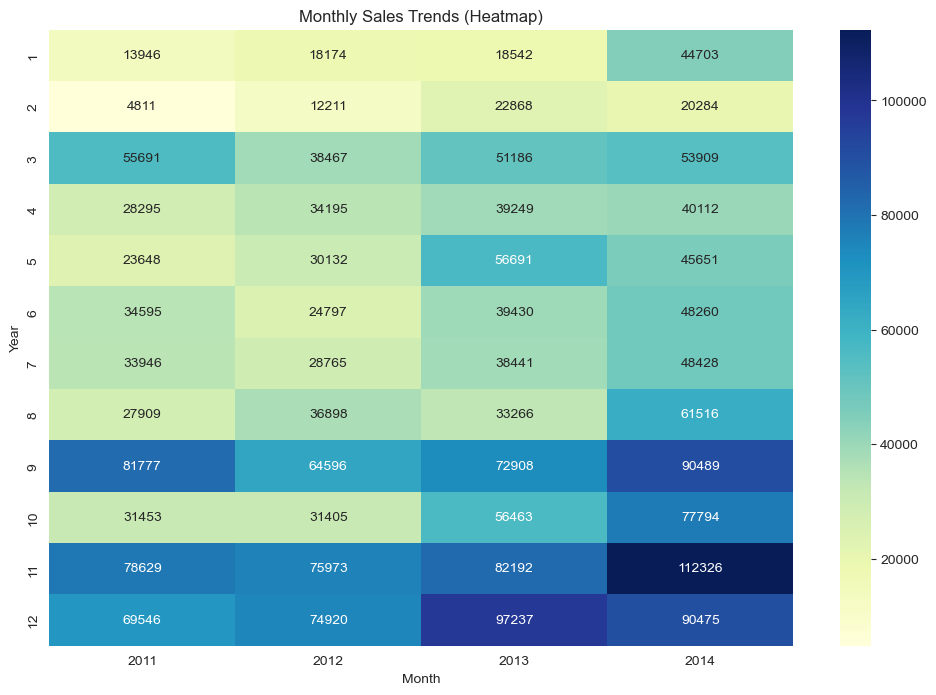

In [20]:
# Create a heatmap of monthly sales trends
monthly_sales = data.pivot_table(values='Sales', columns='year', index='month', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_sales, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Monthly Sales Trends (Heatmap)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

We have notted that:
>
* `Sales increase from August to December significantly compared to the rest of the months`
* `The Sales were close in 2011 and 2012 and then increased in 2012 and 2014`
* `The profits increase every year more than the previous year`

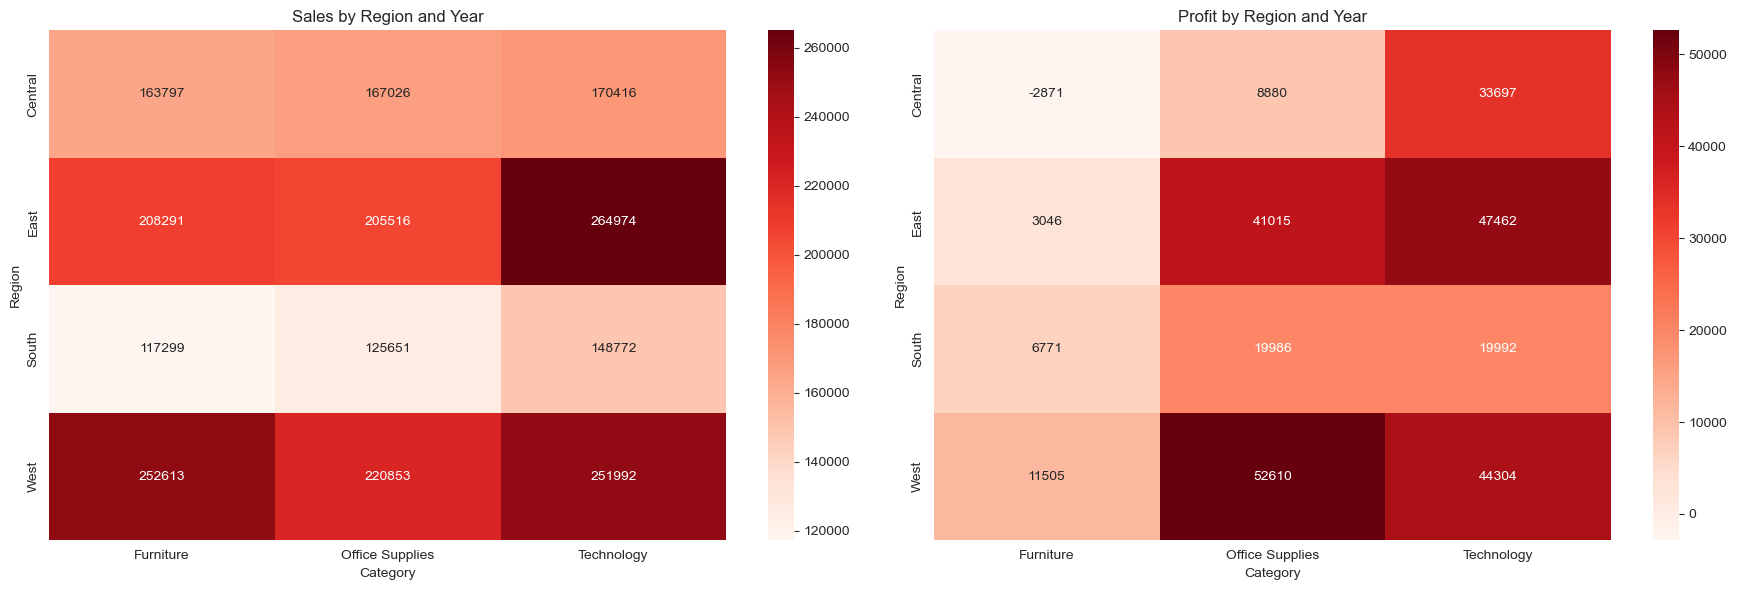

In [21]:
years_region = data.groupby(['Category', 'Region'])[['Sales', 'Profit']].sum().reset_index()

# Creating pivot tables
df_pivot_sales = years_region.pivot(index='Region', columns='Category', values='Sales')
df_pivot_profit = years_region.pivot(index='Region', columns='Category', values='Profit')

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(df_pivot_sales, annot=True, cmap='Reds', fmt='.0f', ax=axes[0])
axes[0].set_title('Sales by Region and Year')


sns.heatmap(df_pivot_profit, annot=True, cmap='Reds', fmt='.0f', ax=axes[1])
axes[1].set_title('Profit by Region and Year')

plt.tight_layout()
plt.show()

#### **Some Observations**
> - `The Western region is the most territory of sales in the two categories Furniture, Office Supplies`
> - `The eastern region is the most sales in the category of technology`

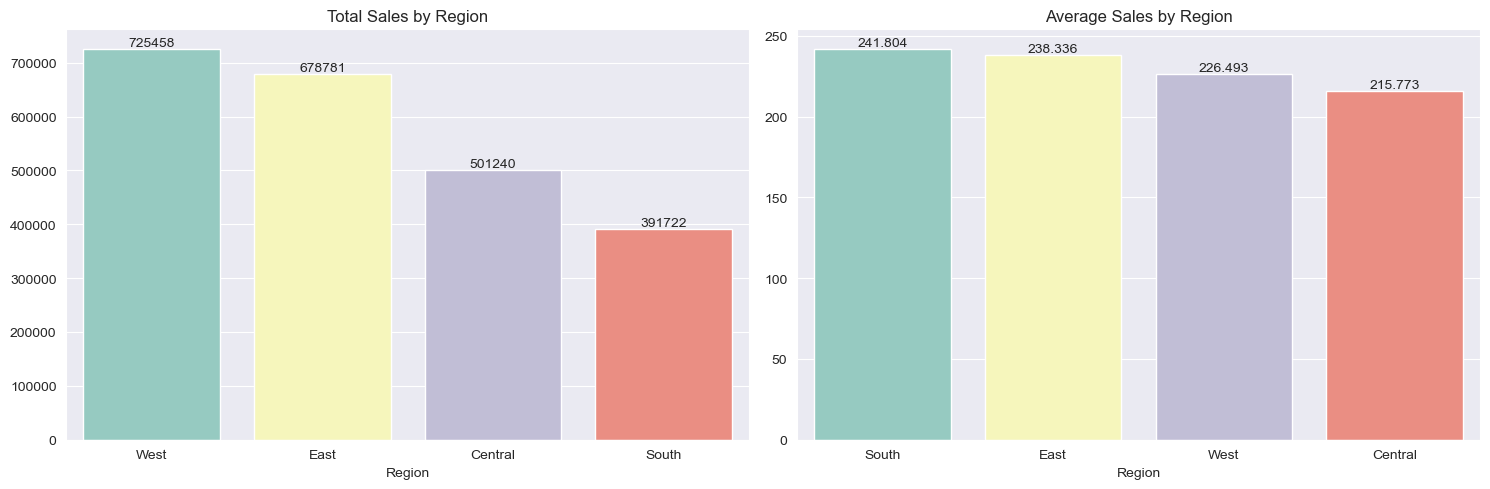

In [22]:
sum_sales_by_region = data.groupby('Region')['Sales'].sum().sort_values(ascending=False)
avg_sales_by_region = data.groupby('Region')['Sales'].mean().sort_values(ascending=False)

ax ,fig = plt.subplots(1,2,figsize=(15,5))

a=sns.barplot(x=sum_sales_by_region.index, y=sum_sales_by_region.values,
              hue=sum_sales_by_region.index,palette="Set3",ax=fig[0])
fig[0].set_title('Total Sales by Region')
for i in a.containers:
    a.bar_label(i)

b=sns.barplot(x=avg_sales_by_region.index, y=avg_sales_by_region.values,hue=avg_sales_by_region.index,palette="Set3",ax=fig[1])
fig[1].set_title('Average Sales by Region')
for i in b.containers:
    b.bar_label(i)

plt.tight_layout()
plt.show()



> -  `We have noticed that the least sales region is the south, but despite that it is the most regional in the average sales and this indicates to every sale in the south achieves a higher value compared to other regions.`

> - `The Western region achieved the highest sales overall, but it ranks third in average sales, behind the Southern and Eastern regions.`


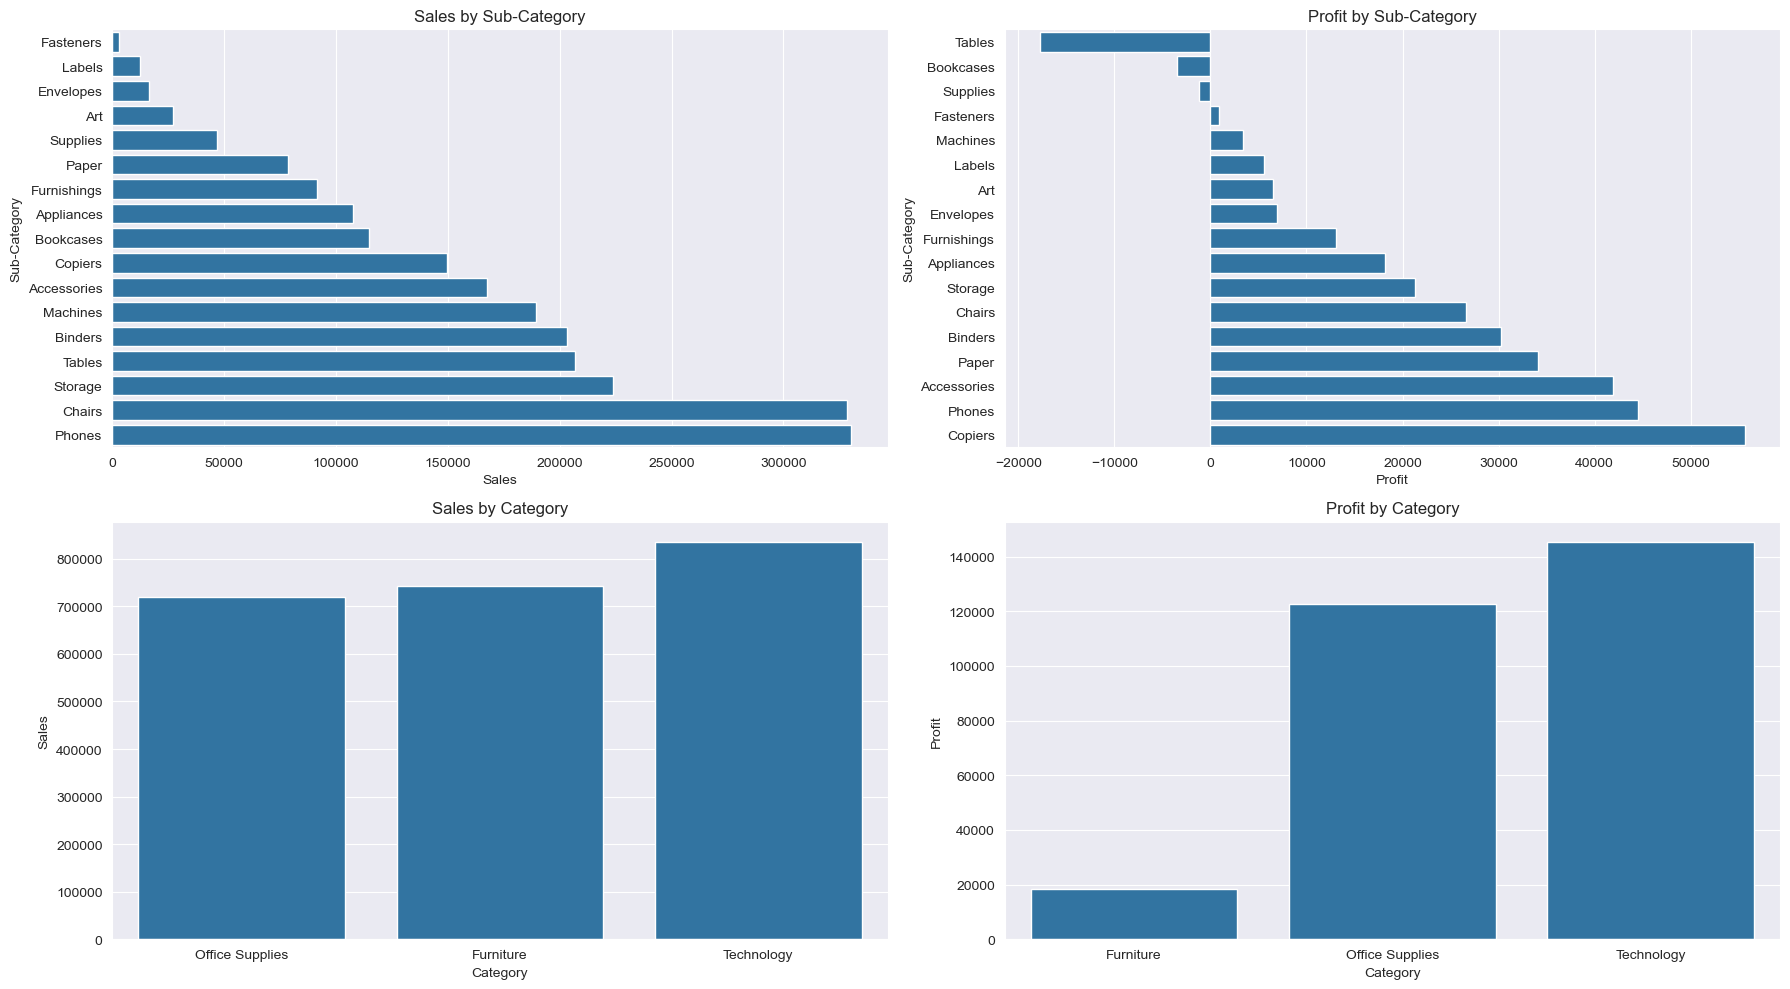

In [23]:
# grouping data by Sub-Category and display it with sales and profits

grouped_data = data.groupby('Sub-Category',as_index=False)[['Sales','Profit']].sum()

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

sns.barplot(data=grouped_data.sort_values(by = 'Sales'), y='Sub-Category', x='Sales', ax=axes[0,0])
axes[0,0].set_title('Sales by Sub-Category')

sns.barplot(data=grouped_data.sort_values(by = 'Profit'), y='Sub-Category', x='Profit', ax=axes[0,1])
axes[0,1].set_title('Profit by Sub-Category')


# grouping data by Category and display it with sales and profits
grouped_data = data.groupby('Category',as_index=False)[['Sales','Profit']].sum()

sns.barplot(data=grouped_data.sort_values(by = 'Sales'), x='Category', y='Sales', ax=axes[1,0])
axes[1,0].set_title('Sales by Category')

sns.barplot(data=grouped_data.sort_values(by = 'Profit'), x='Category', y='Profit', ax=axes[1,1])
axes[1,1].set_title('Profit by Category')

plt.tight_layout()
plt.show()



In [24]:
data.groupby('Category')[['Discount']].mean().reset_index()

,Category,Discount
0,Furniture,0.173923
1,Office Supplies,0.157285
2,Technology,0.132323


> - `The best-selling is phones and chairs, but the most achieved for profits is
Copiers`

> - `Furniture is the least profitable, although it is the second-best selling item with sales exceeding 700,000, but profits not exceeding 20,000.`


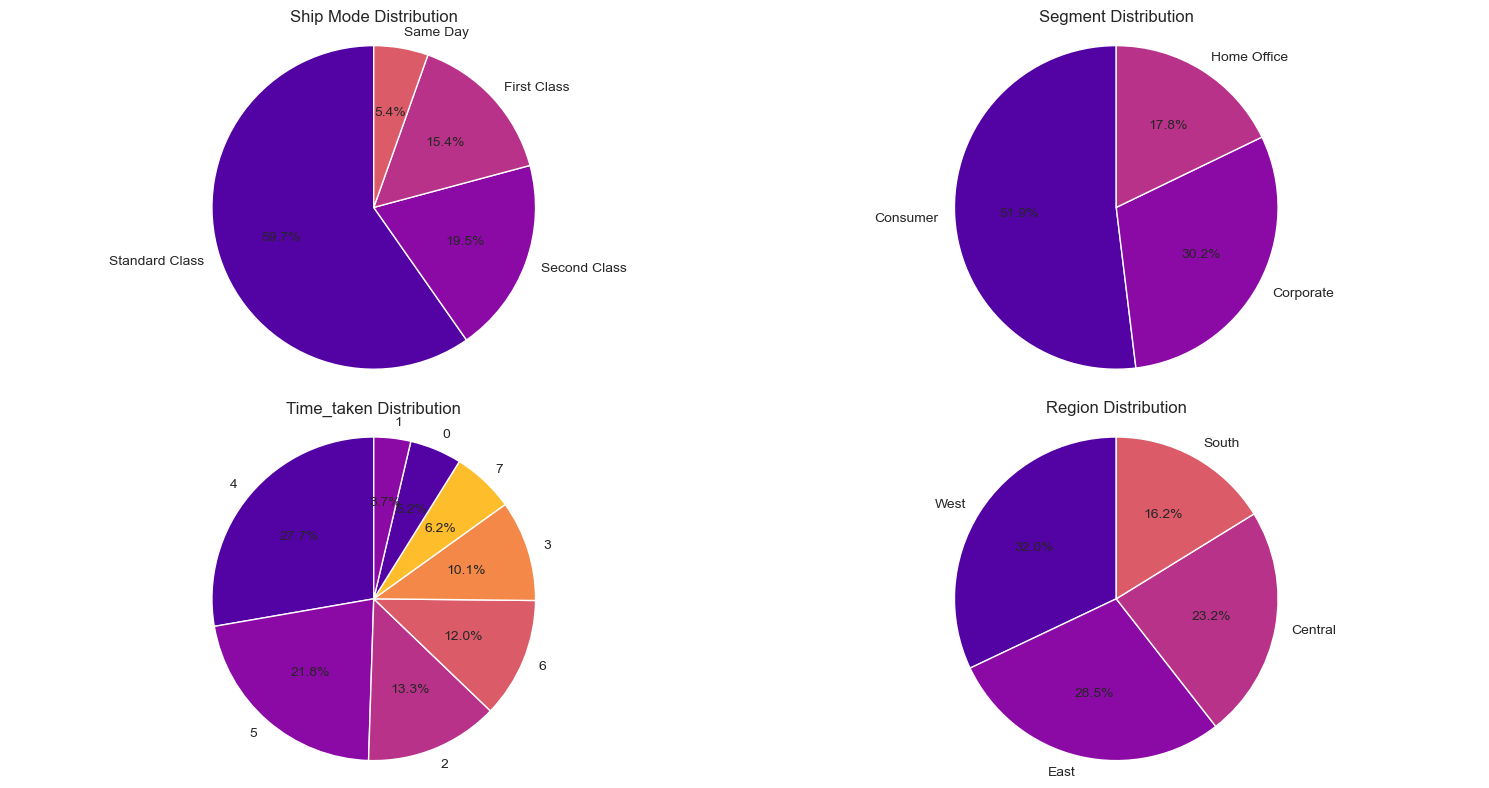

In [25]:
def plot_pie_chart(data, column, title,ax):
    value_counts = data[column].value_counts()
    labels = value_counts.index
    sizes = value_counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('plasma'))
    ax.set_title(title)
    ax.axis('equal')

# create new column contains Time to Ship the product
data["Time_taken"] = (data["Ship Date"] - data["Order Date"]).dt.days

fig, axes = plt.subplots(2, 2, figsize=(15, 8))

plot_pie_chart(data, 'Ship Mode', 'Ship Mode Distribution', axes[0, 0])
plot_pie_chart(data, 'Segment', 'Segment Distribution', axes[0, 1])
plot_pie_chart(data, 'Region', 'Region Distribution', axes[1, 1])
plot_pie_chart(data, 'Time_taken', 'Time_taken Distribution', axes[1,0])

plt.tight_layout()
plt.show()


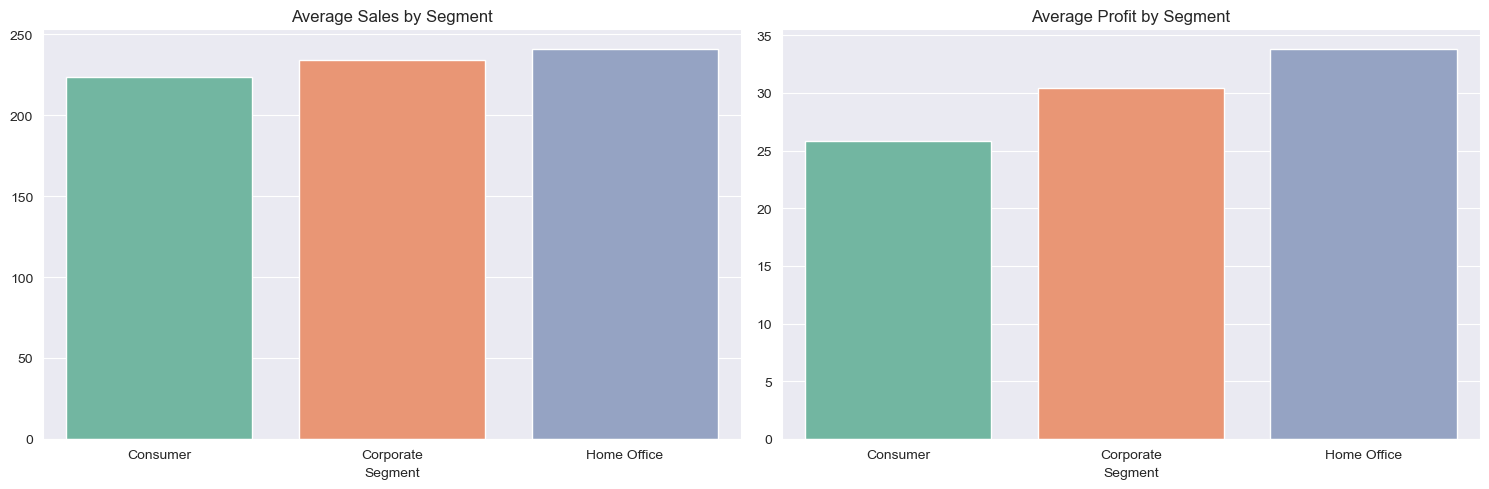

In [26]:
segment_profit = data.groupby('Segment')['Profit'].mean()
segment_sales = data.groupby('Segment')['Sales'].mean()

fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(x=segment_sales.index, y=segment_sales.values,hue=segment_sales.index,palette='Set2',ax=axes[0])
axes[0].set_title('Average Sales by Segment')

sns.barplot(x=segment_profit.index, y=segment_profit.values,hue=segment_profit.index,palette='Set2', ax=axes[1])
axes[1].set_title('Average Profit by Segment')

plt.tight_layout()
plt.show()

>`Home Office has most average Sales and most average Profits`

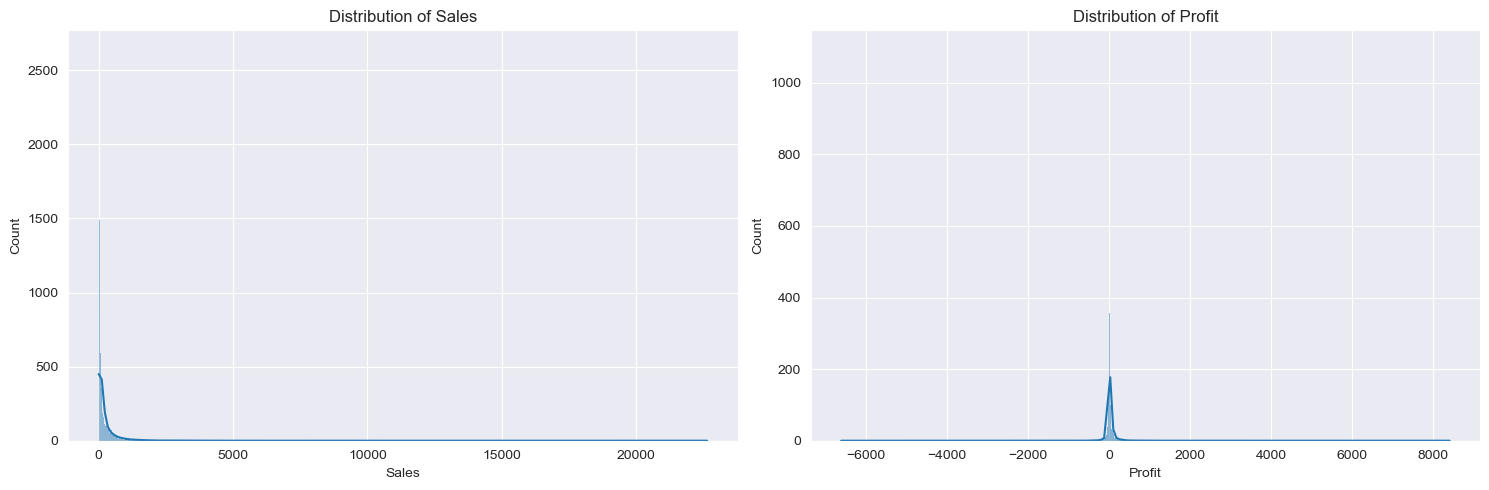

In [27]:
fig ,ax = plt.subplots(1,2, figsize=(15,5))

sns.histplot(data=data, x='Sales', kde=True, ax=ax[0])
ax[0].set_title('Distribution of Sales')

sns.histplot(data=data, x='Profit', kde=True, ax=ax[1])
ax[1].set_title('Distribution of Profit')

plt.tight_layout()
plt.show()

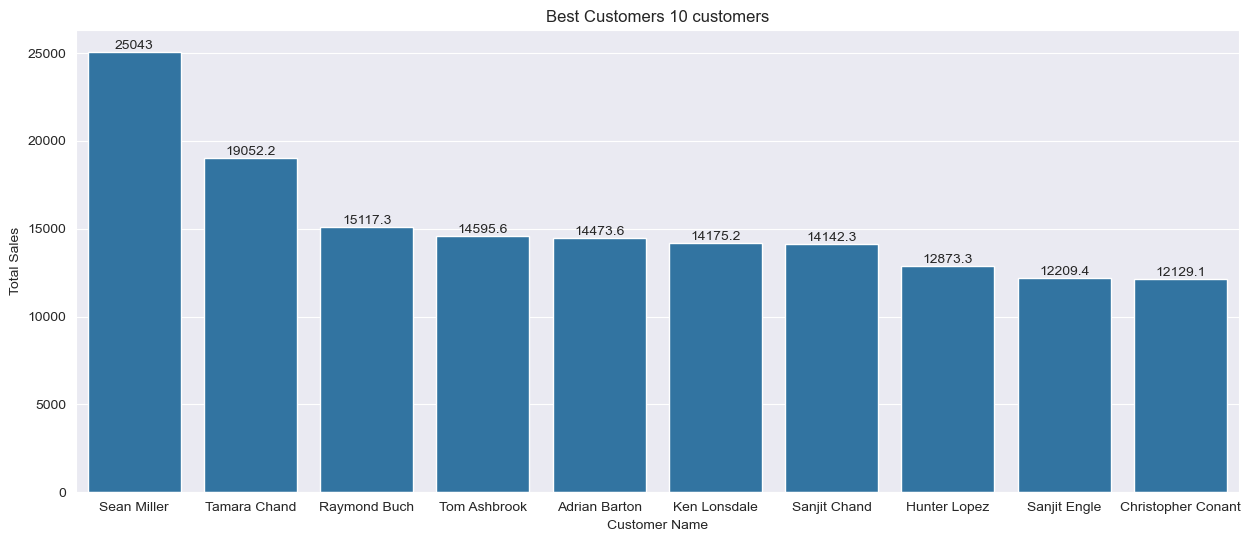

In [28]:
best_customers=data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

a = sns.barplot(x=best_customers.index,y=best_customers.values)
plt.title('Best Customers 10 customers')
plt.ylabel('Total Sales')
plt.xlabel('Customer Name')

for i in a.containers:
    a.bar_label(i,)
plt.show()


In [29]:
print(data.groupby(['Customer Name','Segment'])[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).head(5))
print(data.groupby(['Customer Name','Segment'])[['Sales','Profit']].sum().sort_values(by='Profit',ascending=False).head(5))

                               Sales     Profit
Customer Name Segment                          
Sean Miller   Home Office  25043.050 -1980.7393
Tamara Chand  Corporate    19052.218  8981.3239
Raymond Buch  Consumer     15117.339  6976.0959
Tom Ashbrook  Home Office  14595.620  4703.7883
Adrian Barton Consumer     14473.571  5444.8055
                             Sales     Profit
Customer Name Segment                        
Tamara Chand  Corporate  19052.218  8981.3239
Raymond Buch  Consumer   15117.339  6976.0959
Sanjit Chand  Consumer   14142.334  5757.4119
Hunter Lopez  Consumer   12873.298  5622.4292
Adrian Barton Consumer   14473.571  5444.8055


>* `Sean Miller is the best sales customer, but he's one of the worst at generating profits`

> * `Tamara Chand is the second best sales customer and the best at generating profits. `

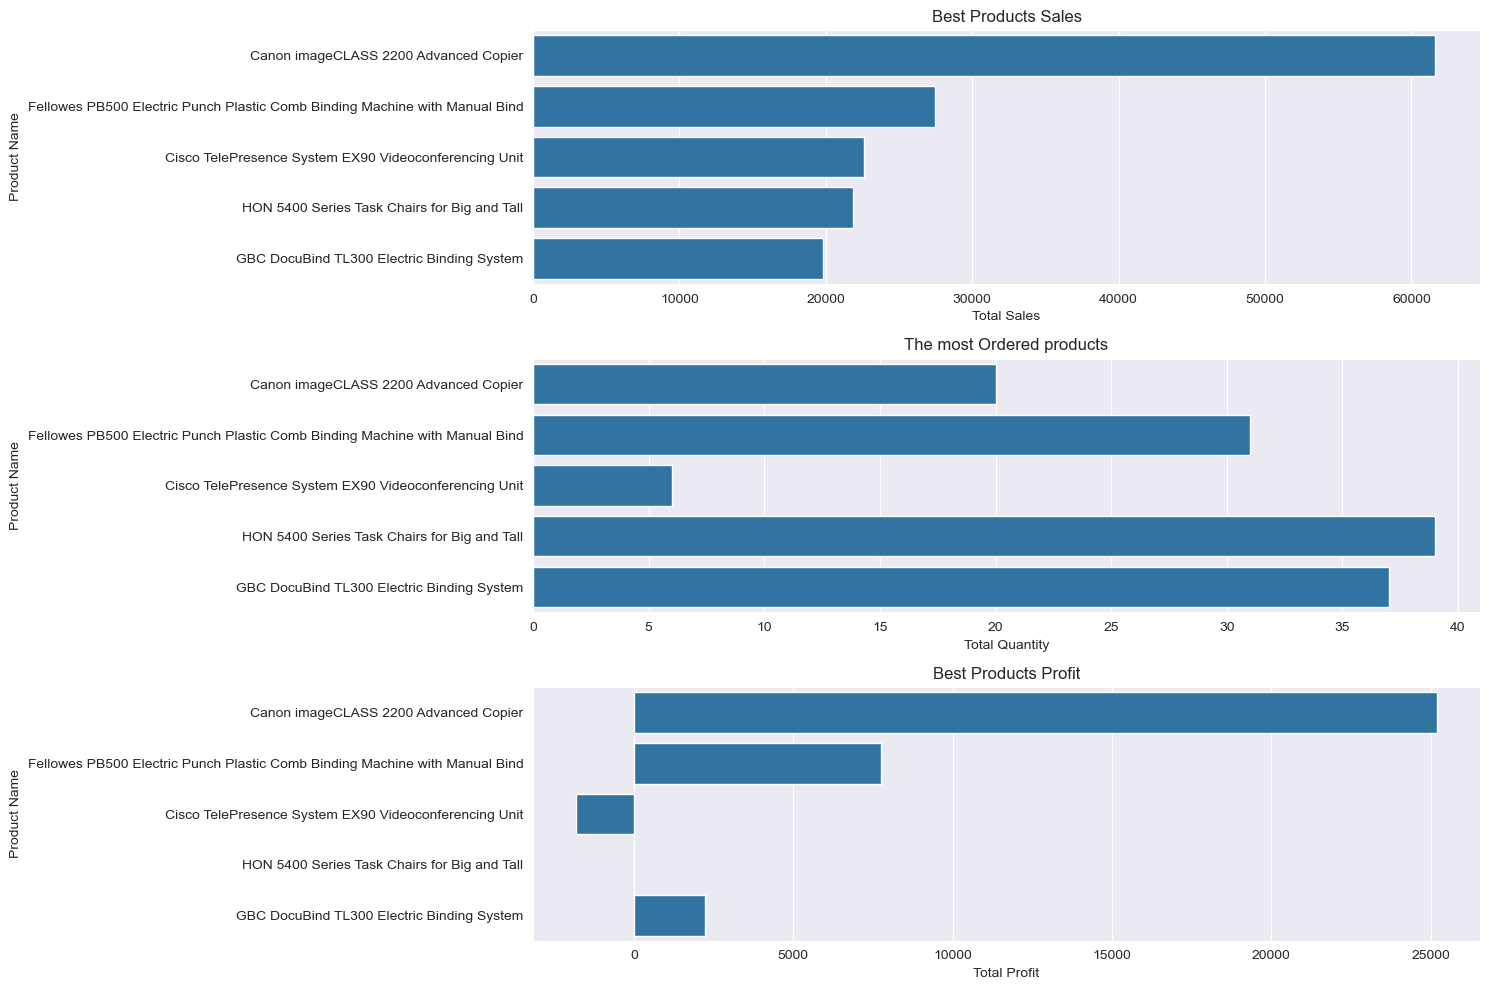

In [30]:
best_products = data.groupby('Product Name')[['Sales','Quantity','Profit']].sum().sort_values(by='Sales',ascending=False).head(5)
ax , fig = plt.subplots(3,1,figsize=(15,10))

sns.barplot(y=best_products.index, x=best_products['Sales'],ax=fig[0])
fig[0].set_title('Best Products Sales')
fig[0].set_ylabel('Product Name')
fig[0].set_xlabel('Total Sales')

sns.barplot(y=best_products.index, x=best_products['Quantity'],ax=fig[1])
fig[1].set_title('The most Ordered products')
fig[1].set_ylabel('Product Name')
fig[1].set_xlabel('Total Quantity')

sns.barplot(y=best_products.index, x=best_products['Profit'],ax=fig[2])
fig[2].set_title('Best Products Profit')
fig[2].set_ylabel('Product Name')
fig[2].set_xlabel('Total Profit')

plt.tight_layout()
plt.show()

> `Canon imageCLASS 2200 Advanced Copier is the best selling and Best Profit`

> `But HON 5400 its most Quantity ordered`

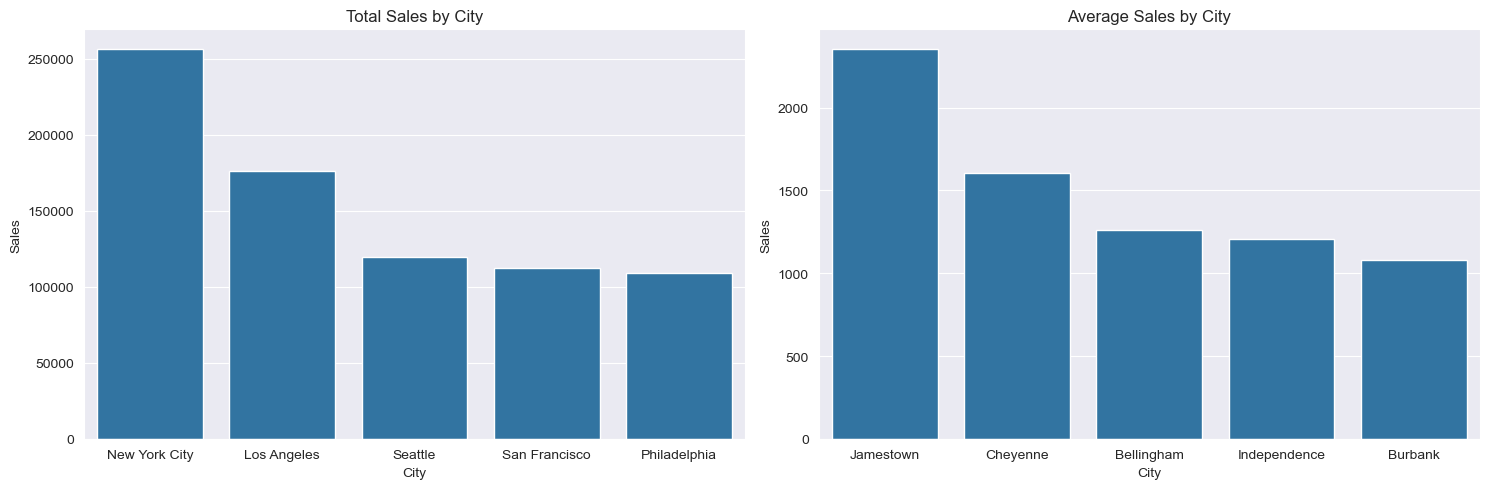

In [31]:
top_total_sales_by_citis=data.groupby('City')['Sales'].sum().sort_values(ascending=False).reset_index().head(5)
top_avg_sales_by_citis=data.groupby('City')['Sales'].mean().sort_values(ascending=False).reset_index().head(5)

ax, fig = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data=top_total_sales_by_citis, x='City', y='Sales', ax=fig[0])
fig[0].set_title('Total Sales by City')

sns.barplot(data=top_avg_sales_by_citis, x='City', y='Sales', ax=fig[1])
fig[1].set_title('Average Sales by City')

plt.tight_layout()
plt.show()


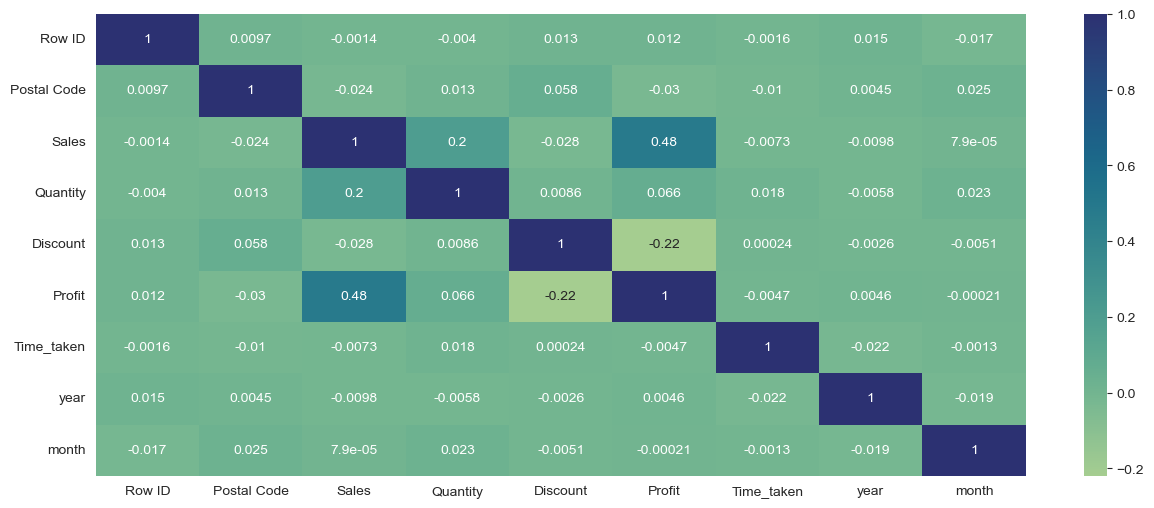

In [33]:
data.select_dtypes(include="number").corr()
sns.heatmap(data.select_dtypes(include="number").corr(),annot=True,cmap="crest")
plt.show()

## see The Gaps between days

In [9]:
ts_data = df.copy()

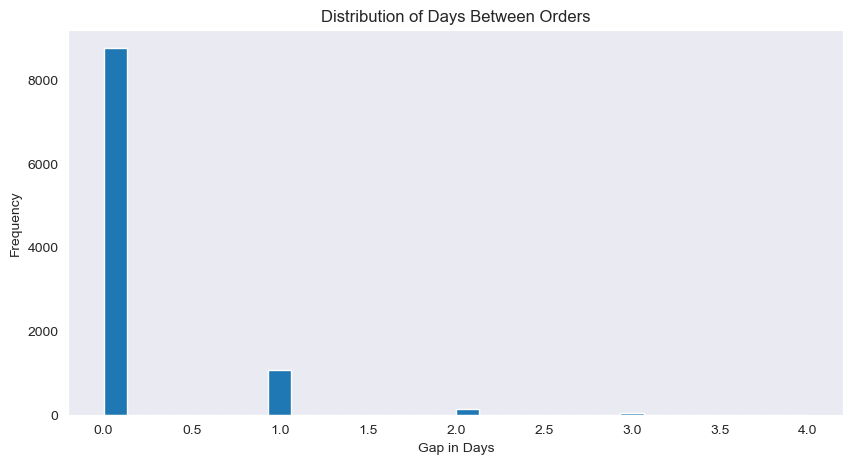

In [10]:
ts_data = ts_data.sort_values("Order Date")
ts_data["gap_days"] = ts_data["Order Date"].diff().dt.days


plt.figure(figsize=(10,5))
ts_data["gap_days"].hist(bins=30)
plt.title("Distribution of Days Between Orders")
plt.xlabel("Gap in Days")
plt.ylabel("Frequency")
plt.grid()
plt.show()


**There're a lot of orders that ordered in same day**

In [11]:
gap_stats = ts_data['gap_days'].describe()
print(gap_stats)


count    9993.000000
mean        0.145802
std         0.422610
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: gap_days, dtype: float64


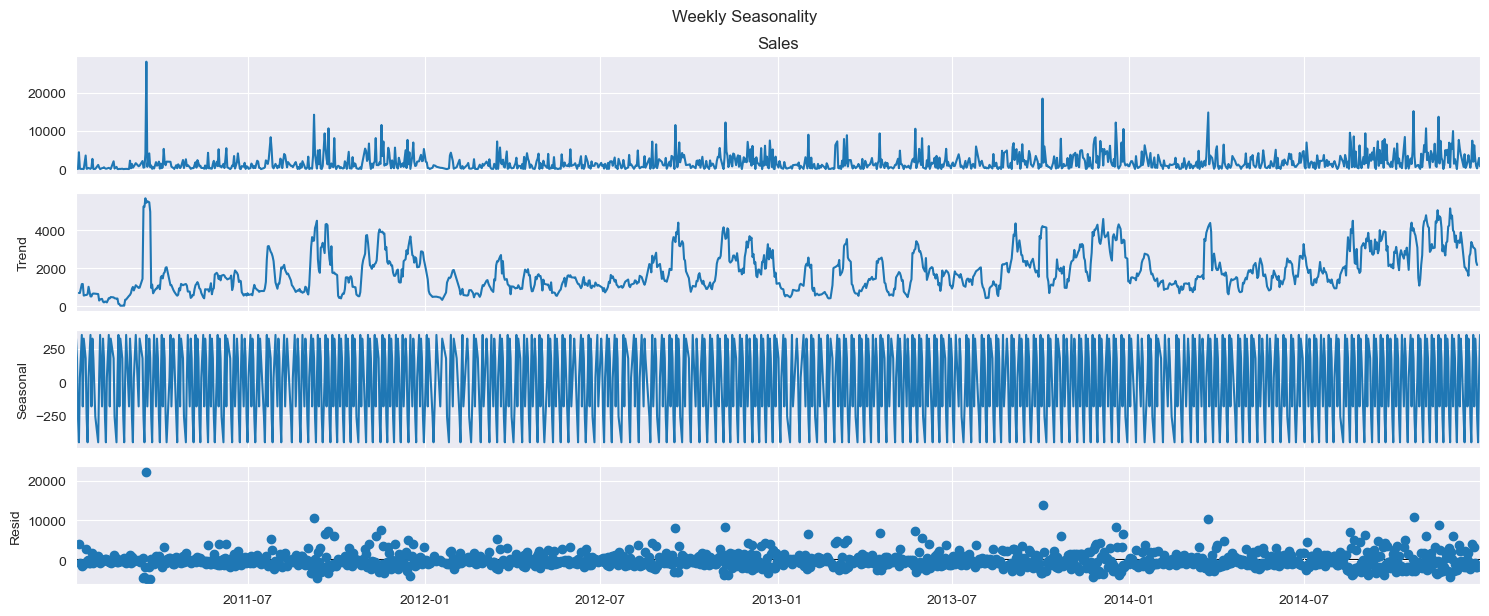

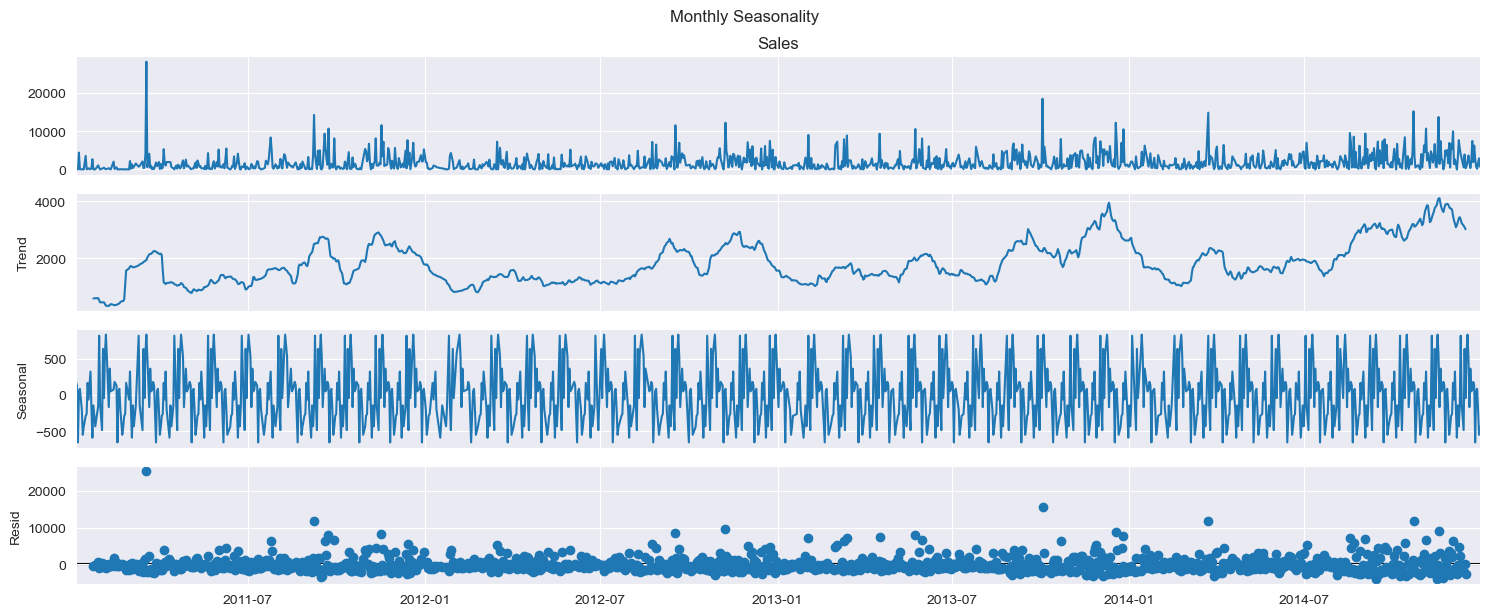

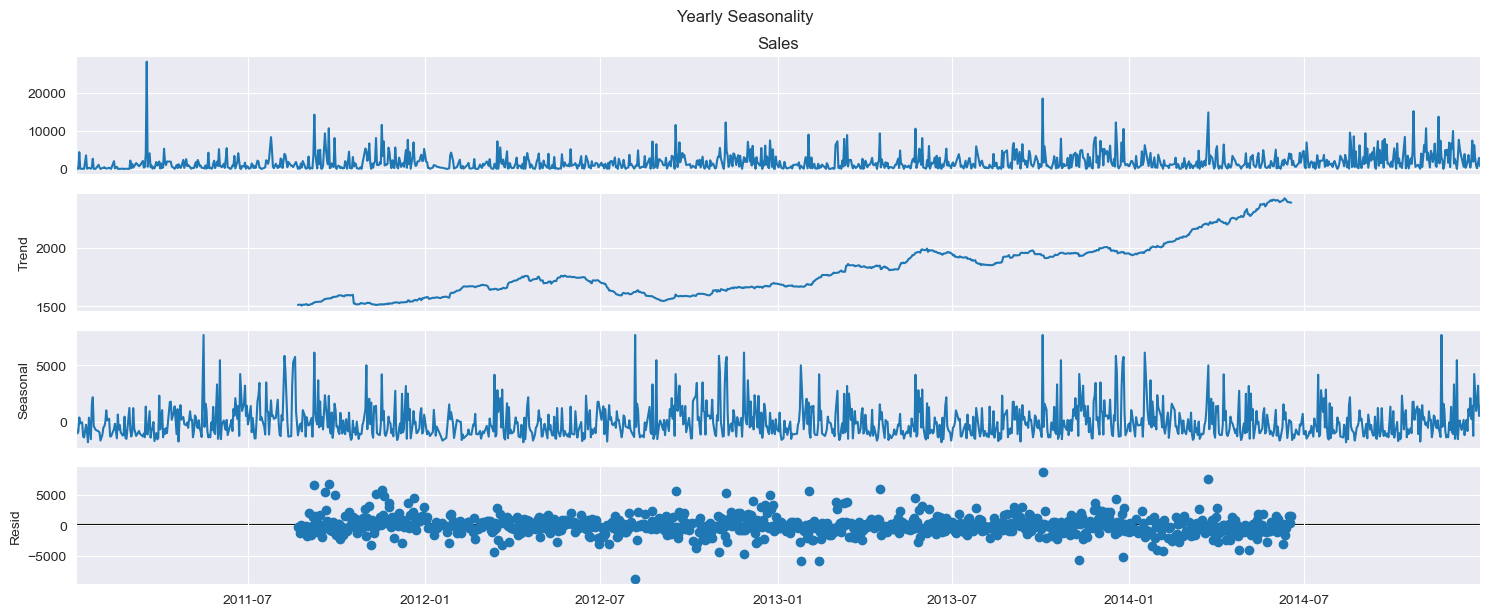

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

daily_sales = df.groupby('Order Date')['Sales'].sum()
# Weekly seasonal analysis (period=7)
decomposition_weekly = seasonal_decompose(daily_sales, model='additive', period=7)
decomposition_weekly.plot()
plt.suptitle('Weekly Seasonality', y=1.02)
plt.show()

# Monthly seasonal analysis (period=30)
decomposition_monthly = seasonal_decompose(daily_sales, model='additive', period=30)
decomposition_monthly.plot()
plt.suptitle('Monthly Seasonality', y=1.02)
plt.show()

# Annual seasonal analysis (period=365)
decomposition_yearly = seasonal_decompose(daily_sales, model='additive', period=365)
decomposition_yearly.plot()
plt.suptitle('Yearly Seasonality', y=1.02)
plt.show()

*Observations -------*

### ADF test for stationarity

In [32]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(daily_sales)

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -5.834888683280246
p-value: 3.8973631781348105e-07
Critical Values:
   1%: -3.4357081998138064
   5%: -2.863906139614306
   10%: -2.568029768447359


### **When Stationary**:
The ADF test shows the time series is stationary **(p-value < 0.05, ADF Statistic < Critical Values)**.

This means the data has stable statistical properties over time, making it ready for modeling.


---

### **When Non-Stationary**:
The ADF test indicates the time series is non-stationary (p-value ≥ 0.05, ADF Statistic > Critical Values).

This suggests trends or seasonality are present, requiring transformations like differencing to stabilize the data.

---
The ADF test results confirm that the time series is stationary, with a p-value of 0.0 and an ADF statistic of -99.26, which is significantly lower than the critical values (-3.43 at 1%, -2.86 at 5%, and -2.57 at 10%).

This indicates stable statistical properties over time, making the data suitable for time series modeling without further transformations

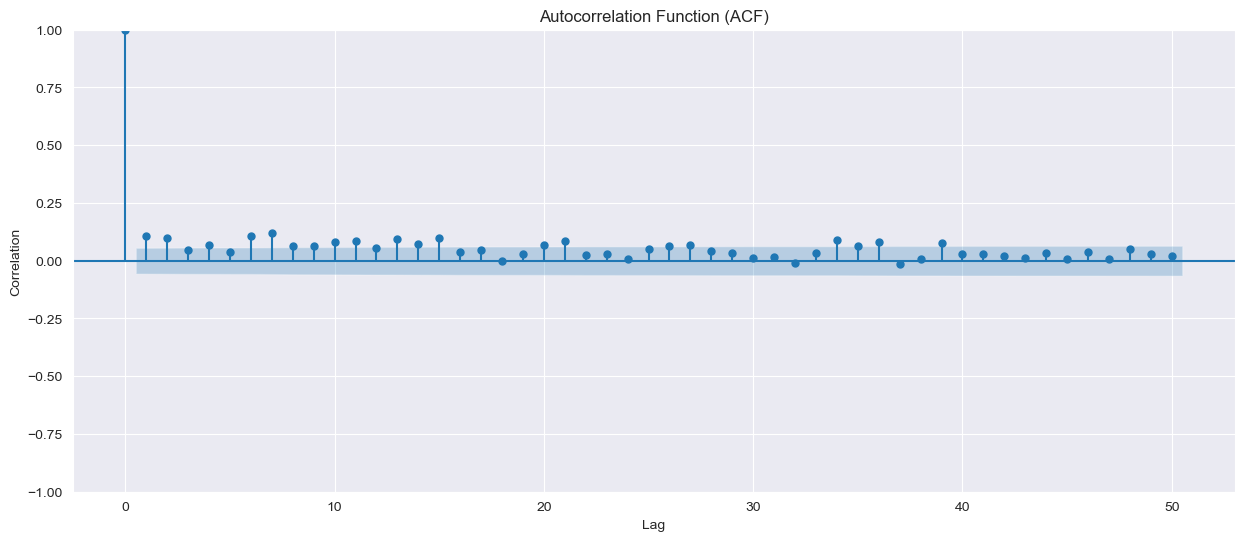

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Group works on history to collect daily sales

# Draw ACF
plot_acf(daily_sales, lags=50)  
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

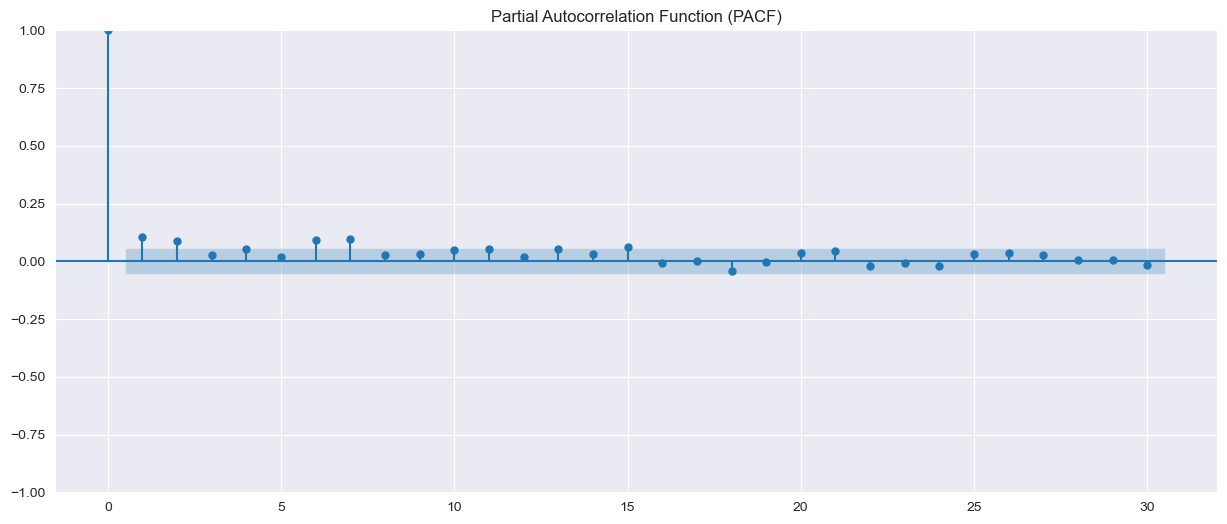

In [38]:
# Draw PACF
plot_pacf(daily_sales, lags=30, method='ywm')  # Use Method = 'YWM' to avoid warnings
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

### ACF and PACF Insights
plotted:
- **ACF (Autocorrelation Function):** to observe overall correlations between sales and previous lags.
- **PACF (Partial Autocorrelation Function):** to observe direct correlations between sales and specific lags after removing intermediate effects.

From the plots:
- ACF showed slow decay, indicating strong autocorrelation at lag 1, 2, 3, etc.
- PACF showed a sharp drop after lag 1, suggesting that an **AR(1)** model might be a good fit.

## Filling gabs (Zero-Sales Dayes) in Daily data

In [103]:
start_date = df['Order Date'].min()
end_date = df['Order Date'].max()

full_date_range = pd.date_range(start=start_date,end=end_date,freq='D')
full_date_df = pd.DataFrame( full_date_range ,columns=['Order Date'])

In [104]:
df_daily = df.groupby('Order Date').agg({'Sales':'sum',
                                   'Profit':'sum',
                                   'Quantity':'sum',
                                   'Discount':'sum'}).reset_index().sort_values(by='Order Date')

In [105]:
df_daily = pd.merge(full_date_df,df_daily,on='Order Date',how='left')
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  1458 non-null   datetime64[ns]
 1   Sales       1238 non-null   float64       
 2   Profit      1238 non-null   float64       
 3   Quantity    1238 non-null   float64       
 4   Discount    1238 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.1 KB


In [106]:
columns_to_fill = df_daily.columns[1:].to_list()

df_daily[columns_to_fill] = df_daily[columns_to_fill].fillna(0)

In [107]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  1458 non-null   datetime64[ns]
 1   Sales       1458 non-null   float64       
 2   Profit      1458 non-null   float64       
 3   Quantity    1458 non-null   float64       
 4   Discount    1458 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.1 KB


# Feature Engineering

In [184]:
import holidays
from datetime import date

us_holidays = holidays.UnitedStates()

# Add holidays
print(date(2013,12 ,25) in us_holidays)
df_daily['is_holiday'] = df_daily['Order Date'].apply(lambda x : x in us_holidays).astype(int)

True


In [109]:
df_daily['year'] = df_daily['Order Date'].dt.year
df_daily['month'] = df_daily['Order Date'].dt.month
df_daily['day_of_year'] = df_daily['Order Date'].dt.dayofyear
df_daily['day_of_week'] = df_daily['Order Date'].dt.dayofweek
df_daily['is_weekend'] = df_daily['day_of_week'].isin([5, 6]).astype(int)
df_daily['quarter'] = df_daily['Order Date'].dt.quarter


In [110]:
# Create lag features for sales
df_daily['sales_lag_1'] = df_daily['Sales'].shift(1)  
df_daily['sales_lag_1'] = df_daily['Sales'].shift(2)
df_daily['sales_lag_1'] = df_daily['Sales'].shift(3)      # Previous day's sales
df_daily['sales_lag_7'] = df_daily['Sales'].shift(7)    # Sales from 1 week ago
df_daily['sales_lag_14'] = df_daily['Sales'].shift(14)  # Sales from 2 weeks ago
df_daily['sales_lag_30'] = df_daily['Sales'].shift(30)  # Sales from 1 month ago
df_daily['sales_lag_365'] = df_daily['Sales'].shift(365) # Sales from 1 year ago


df_daily['Profit_lag_7'] = df_daily['Profit'].shift(7) # profit from 2 weeks ago
df_daily['Quantity_lag_7'] = df_daily['Quantity'].shift(7) # Qunatity from 2 weeks ago 

# df_daily['Profit_lag_7'] = df_daily['Profit'].shift(7) # profit from 2 weeks ago
df_daily['Quantity_lag_14'] = df_daily['Quantity'].shift(14)
df_daily['Quantity_lag_30'] = df_daily['Quantity'].shift(30)


df_daily['rolling_mean_sales_3d'] = df_daily['Sales'].rolling(window=3).mean() # Calculate 3-day rolling mean of sales
df_daily['rolling_mean_sales_7d'] = df_daily['Sales'].rolling(window=7).mean()  # (7-day) rolling mean of sales
df_daily['rolling_mean_sales_14d'] = df_daily['Sales'].rolling(window=14).mean()
df_daily['rolling_mean_sales_30d'] = df_daily['Sales'].rolling(window=30).mean() #(30-day) rolling mean of sales
df_daily['rolling_mean_sales_1q'] = df_daily['Sales'].rolling(window=120).mean()

In [111]:
df_daily.drop(['Discount','Profit','Quantity'],axis=1,inplace=True)

In [112]:
df_daily.isnull().sum()

Order Date                  0
Sales                       0
year                        0
month                       0
day_of_year                 0
day_of_week                 0
is_weekend                  0
quarter                     0
sales_lag_1                 3
sales_lag_7                 7
sales_lag_14               14
sales_lag_30               30
sales_lag_365             365
Profit_lag_7                7
Quantity_lag_7              7
Quantity_lag_14            14
Quantity_lag_30            30
rolling_mean_sales_3d       2
rolling_mean_sales_7d       6
rolling_mean_sales_14d     13
rolling_mean_sales_30d     29
rolling_mean_sales_1q     119
dtype: int64

In [113]:
df_daily = df_daily.fillna(0)

In [114]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order Date              1458 non-null   datetime64[ns]
 1   Sales                   1458 non-null   float64       
 2   year                    1458 non-null   int32         
 3   month                   1458 non-null   int32         
 4   day_of_year             1458 non-null   int32         
 5   day_of_week             1458 non-null   int32         
 6   is_weekend              1458 non-null   int32         
 7   quarter                 1458 non-null   int32         
 8   sales_lag_1             1458 non-null   float64       
 9   sales_lag_7             1458 non-null   float64       
 10  sales_lag_14            1458 non-null   float64       
 11  sales_lag_30            1458 non-null   float64       
 12  sales_lag_365           1458 non-null   float64 

# Time Series modeling

## ARIMA

##### Data Spiltting for Time Series

In [203]:
arima_df=df_daily.set_index('Order Date')
sales = arima_df['Sales']
sales = sales.resample("W").sum()

train = sales.loc['2011-01-01':'2014-12-01']
test = sales.loc['2014-12-02':]

In [116]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [204]:
arima_model = ARIMA(train,order=(1,0,1))
arima_model_fit = arima_model.fit()

arima_forecast = arima_model_fit.forecast(steps=len(test))

arima_model_fit.predict(start=test.index[0], end=test.index[-1])

mse_arima=mean_squared_error(test, arima_forecast)
rmse_arima = np.sqrt(mse_arima)
r2_arima=r2_score(test, arima_forecast)

print(f'RMSE: {rmse_arima}')
print(f'R2 Score: {r2_arima}')

RMSE: 6675.367011228041
R2 Score: 0.29373618166907445


In [208]:

# plot ARIMA Forecasting
plot_df = pd.DataFrame({
    'Date': test.index,
    'Test': test.values,
    'Forecast': arima_forecast
})

fig = px.line(plot_df, x='Date', y=['Test', 'Forecast'],
              title='ARIMA Forecast',
              labels={'value': 'Sales', 'variable': ''})
fig.show()

fig.write_image(config['dir']['artifacts_dir']+'/ARIMA.png')


## Exponential Smoothing (ETS),

In [119]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# For trend + seasonality
model = ExponentialSmoothing(
    train,
    trend='add',               # 'add' or 'mul'
    seasonal='add',            # 'add' or 'mul'
    seasonal_periods=12        # e.g., 12 for monthly seasonality
)

fit = model.fit()

c:\Users\Check-In\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [120]:
forecast = fit.forecast(len(test))

mse_ets=mean_squared_error(test, forecast)
rmse_ets = np.sqrt(mse_ets)
r2_ets=r2_score(test, forecast)

print(f'RMSE: {rmse_ets}')
print(f'R2 Score: {r2_ets}')


RMSE: 8733.252222803965
R2 Score: -0.05992306860244212


In [121]:

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Date': test.index,
    'Test': test.values,
    'Forecast': forecast
})

# Create plot with plotly express
fig = px.line(plot_df, x='Date', y=['Test', 'Forecast'],
              title='ETS Forecast',
              labels={'value': 'Sales', 'variable': ''})

# Update line style for forecast
fig.update_traces(line_dash='dash', selector=dict(name='Forecast'))

fig.show()
fig.write_image(config['dir']['artifacts_dir']+'/ETS.png')


## Prophet

In [122]:
from prophet import Prophet

In [164]:
df_prophet = df_daily.reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Data split
split_date = '2014-12-15'
train_prophet = df_prophet[df_prophet['ds'] < split_date]
test_prophet = df_prophet[df_prophet['ds'] >= split_date]

# Initialize Prophet model and add regressors
m = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='multiplicative', # Often good for sales
)

# Add your engineered features as regressors
# Make sure these columns exist in both train_prophet and the future DataFrame
regressors = df_daily.columns[2:].tolist()
for col in regressors:
    m.add_regressor(col)

# Fit the model
m.fit(train_prophet)


03:35:39 - cmdstanpy - INFO - Chain [1] start processing
03:35:39 - cmdstanpy - INFO - Chain [1] done processing


In [165]:
# Create future dataframe, including regressor values for the forecast period

future = m.make_future_dataframe(periods=len(test_prophet), freq='D')
# Merge the regressors into the future DataFrame
future = pd.merge(future, df_prophet[['ds'] + regressors], on='ds', how='left')

# Make predictions
forecast = m.predict(future)

# Extract predictions for the test period
predictions_series = forecast.set_index('ds')['yhat'].loc[test_prophet['ds'].min():]

# Align actuals for evaluation
actuals_series = test_prophet.set_index('ds')['y']

# Evaluate
mse_prophet = mean_squared_error(actuals_series, predictions_series)
rmse_prophet = np.sqrt(mse_prophet)
mae_prophet = mean_absolute_error(actuals_series, predictions_series)
r2_prophet = r2_score(actuals_series, predictions_series)


print(f"Prophet Model with Regressors Fitted.")
print(f"\nRMSE: {rmse_prophet:.2f}")
print(f"MAE: {mae_prophet:.2f}")
print(f"R2 : {r2_prophet}")


Prophet Model with Regressors Fitted.

RMSE: 1414.41
MAE: 1066.69
R2 : 0.48915289688640085


In [166]:
# Create figure
fig = go.Figure()

# Add actual sales trace
fig.add_trace(go.Scatter(
    x=test_prophet['ds'],
    y=test_prophet['y'],
    name='Actual Sales',
    line=dict(color='orange')
))

# Add forecast trace
fig.add_trace(go.Scatter(
    x=predictions_series.index,
    y=predictions_series.values,
    name='Forecasted Sales',
    line=dict(color='blue')
))

# Update layout
fig.update_layout(
    title='Prophet Daily Sales Forecast with Regressors',
    xaxis_title='Date',
    yaxis_title='Daily Sales',
    showlegend=True,
    hovermode='x unified'
)

# Show the plot
fig.show()

fig.write_image(config['dir']['artifacts_dir']+'/Prophet.png')


In [126]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,QuantileTransformer
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error,median_absolute_error,mean_absolute_error,adjusted_rand_score,accuracy_score

import joblib

In [127]:
def plot_forecast(dates,y_actual,y_pred,model_name : str):

    # Convert y_test and y_pred to pandas Series
    dates = pd.to_datetime(dates)

    y_actual_series = pd.Series(y_actual.values, index=dates)
    y_pred_series = pd.Series(y_pred, index=dates)

    y_actual_resampled = y_actual_series.resample('W').sum()
    y_pred_resampled = y_pred_series.resample('W').sum()


    fig = go.Figure()

    # Actual Sales
    fig.add_trace(go.Scatter(
        x=y_actual_resampled.index,
        y=y_actual_resampled.values,
        mode='lines+markers',
        name='Actual Weekly Sales',
        line=dict(color='royalblue', width=2),
        marker=dict(size=6)
    ))

    # Predicted Sales
    fig.add_trace(go.Scatter(
        x=y_pred_resampled.index,
        y=y_pred_resampled.values,
        mode='lines+markers',
        name=f'{model_name} Predicted Sales',
        line=dict(color='firebrick', width=2, dash='dash'),
        marker=dict(size=6)
    ))

    # Format the plot
    fig.update_layout(
        title=f'📈 Weekly Actual vs {model_name} Predicted Sales',
        title_font=dict(size=22, color='darkblue'),
        xaxis_title='Date',
        yaxis_title='Sales Amount',
        xaxis=dict(showgrid=True, gridcolor='lightgray'),
        yaxis=dict(showgrid=True, gridcolor='lightgray'),
        plot_bgcolor='white',
        legend=dict(
            x=0.01, y=0.99,
            bgcolor='rgba(255,255,255,0)',
            bordercolor='gray'
        ),
        hovermode='x unified',
        height=550,
        width=1100
    )

    fig.write_image(config['dir']['artifacts_dir'] +'/forecast.png')

    return fig

## SARIMAX

In [128]:
col_sarimax = df_daily.columns[2:]

In [167]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Convert 'Order Date' to datetime
data_sarima = df_daily.set_index('Order Date')

sales = data_sarima['Sales']
features = data_sarima[col_sarimax]

# Split train/test
train_sales = sales.loc[:'2014-12-20']
test_sales = sales.loc['2014-12-21':]

train_exog = features.loc[:'2014-12-20']
test_exog = features.loc['2014-12-21':]

# Train the model
model = SARIMAX(train_sales, exog=train_exog,seasonal_order=(2,0,0,12))
model_sarimax = model.fit(disp=False)

# Make predictions
y_pred_sarima = model_sarimax.predict(start=test_sales.index[0], end=test_sales.index[-1], exog=test_exog)

# Calculate evaluation metrics
mse_sarimax = mean_squared_error(test_sales, y_pred_sarima)
rmse_sarimax = np.sqrt(mse_sarimax)
mae_sarimax = mean_absolute_error(test_sales, y_pred_sarima)
r2_sarimax = r2_score(test_sales, y_pred_sarima)

print(f'SARIMAX Model Evaluation:')
print(f'MSE: {mse_sarimax:.2f}')
print(f'RMSE: {rmse_sarimax:.2f}')
print(f'MAE: {mae_sarimax:.2f}')
print(f'R2 Score: {r2_sarimax:.2f}')



c:\Users\Check-In\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\Check-In\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\Check-In\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX Model Evaluation:
MSE: 2329350.54
RMSE: 1526.22
MAE: 1112.37
R2 Score: 0.54


In [168]:
# Create a DataFrame with actual and predicted values
plot_df = pd.DataFrame({
    'Date': test_sales.index,
    'Actual': test_sales.values,
    'Predicted': y_pred_sarima.values
})

# Melt the DataFrame for plotting
plot_df_melted = pd.melt(plot_df, id_vars=['Date'], value_vars=['Actual', 'Predicted'], 
                        var_name='Type', value_name='Sales')

# Create the line plot
fig = px.line(plot_df_melted, x='Date', y='Sales', color='Type',
              title='SARIMAX: Actual vs Predicted Sales',
              labels={'Sales': 'Weekly Sales', 'Date': 'Date'})

fig.show()

fig.write_image(config['dir']['artifacts_dir']+'/SARIMAX.png')

## Split the data

In [185]:
# Set the Order Date as index for time series analysis
sales = df_daily.set_index('Order Date').resample('D').sum()

# Split data into training (up to Oct 1, 2014) and test (from Oct 2, 2014) sets
train_rf = sales.loc[:'2014-12-20']
test_rf  = sales.loc['2014-12-21':]

# Extract dates for later use
dates_test = test_rf.reset_index()['Order Date']
dates_train = train_rf.reset_index()['Order Date']

# Prepare features (X) by dropping target variable and date columns
x_train  = train_rf.reset_index().drop(['Sales','Order Date'],axis=True)
x_test  = test_rf.reset_index().drop(['Sales','Order Date'],axis=True)

# Prepare target variable (y) for both training and test sets
y_train = train_rf.reset_index()['Sales']
y_test = test_rf.reset_index()['Sales']

## Random Forest

In [132]:
x_train.shape

(1447, 20)

In [133]:
from sklearn.ensemble import RandomForestRegressor

In [186]:
rf=RandomForestRegressor(random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [187]:
y_pred = rf.predict(x_test)


mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test,y_pred)



print("RMSE:",rmse_rf)
print("R2 Score:",r2_rf )

RMSE: 1478.1880390936965
R2 Score: 0.5681190418733555


### 
Fine tuning

In [136]:
import optuna

In [175]:
# Define objective function
def objective(trial):
    # Suggest values for hyperparameters
    params = {
    'n_estimators' : trial.suggest_int("n_estimators", 10, 200, log=True),
    'max_depth' : trial.suggest_int("max_depth", 2, 40),
    'min_samples_split' : trial.suggest_int("min_samples_split", 2, 20),
    'min_samples_leaf' :trial.suggest_int("min_samples_leaf", 1, 20)
    }
    # Create and fit random forest model
    model = RandomForestRegressor(**params)
    model.fit(x_train, y_train)

    # Make predictions and calculate RMSE
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Return MAE
    return rmse

study = optuna.create_study(direction='minimize')

study.optimize(objective,n_trials=300,show_progress_bar=True)

[I 2025-05-29 03:42:14,008] A new study created in memory with name: no-name-269a2dbd-779b-4344-91e1-18f33f0e3e39


  0%|          | 0/300 [00:00<?, ?it/s]

[I 2025-05-29 03:42:14,181] Trial 0 finished with value: 1451.0408538454571 and parameters: {'n_estimators': 10, 'max_depth': 26, 'min_samples_split': 17, 'min_samples_leaf': 14}. Best is trial 0 with value: 1451.0408538454571.
[I 2025-05-29 03:42:15,322] Trial 1 finished with value: 1314.7179239934374 and parameters: {'n_estimators': 76, 'max_depth': 23, 'min_samples_split': 13, 'min_samples_leaf': 8}. Best is trial 1 with value: 1314.7179239934374.
[I 2025-05-29 03:42:15,531] Trial 2 finished with value: 1339.958391962705 and parameters: {'n_estimators': 13, 'max_depth': 15, 'min_samples_split': 14, 'min_samples_leaf': 9}. Best is trial 1 with value: 1314.7179239934374.
[I 2025-05-29 03:42:15,684] Trial 3 finished with value: 1406.3969604864394 and parameters: {'n_estimators': 10, 'max_depth': 39, 'min_samples_split': 12, 'min_samples_leaf': 20}. Best is trial 1 with value: 1314.7179239934374.
[I 2025-05-29 03:42:15,970] Trial 4 finished with value: 1158.4371540250186 and parameters:

In [176]:
study.best_params

{'n_estimators': 18,
 'max_depth': 26,
 'min_samples_split': 11,
 'min_samples_leaf': 18}

In [177]:
from sklearn.model_selection import cross_val_score

trial = study.best_params
best_model_rf = RandomForestRegressor(**trial)

# Perform 5-fold cross validation
cv_scores = cross_val_score(best_model_rf, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
cv_scores = -cv_scores  # Convert back to positive RMSE values

print(f"Cross-validation RMSE scores: {cv_scores}")
print(f"Mean CV RMSE: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Fit the model on full training data
best_model_rf.fit(x_train, y_train)



Cross-validation RMSE scores: [1854.56209658 1135.1749896  1526.47954839 1654.78881165 1886.2730417 ]
Mean CV RMSE: 1611.4557 (+/- 544.4758)


RandomForestRegressor(max_depth=26, min_samples_leaf=18, min_samples_split=11,
                      n_estimators=18)

In [178]:
preds_rf = best_model_rf.predict(x_test)
mse_rf = mean_squared_error(y_test, preds_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test,preds_rf)
mae_rf = mean_absolute_error(y_test,preds_rf)
mape_rf = mean_absolute_percentage_error(y_test,preds_rf)
medae_rf =median_absolute_error(y_test,preds_rf)

print(f'Final MSE on validation set: {mse_rf:.4f}')
print(f'Final RMSE on validation set: {rmse_rf:.4f}')
print(f'Final R2 on validation set: {r2_rf:.4f}')
print(f'Final mean absolute error: {mae_rf:.4f}')
print(f'Final mean absolute percentage error: {mape_rf:.4f}')
print(f'Final median absolute error: {medae_rf:.4f}')

Final MSE on validation set: 1398678.4505
Final RMSE on validation set: 1182.6574
Final R2 on validation set: 0.7235
Final mean absolute error: 920.2618
Final mean absolute percentage error: 0.5972
Final median absolute error: 653.4430


In [141]:
fig = plot_forecast(dates_test,y_test,preds_rf,model_name='RandomForest')
fig.show()
# fig.write_image(config['dir']['artifacts_dir']+'/Randome_forest.png')

## XGBoost

In [142]:
from xgboost import XGBRegressor

In [188]:
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [189]:
y_pred = model_xgb.predict(np.asarray(x_test))

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgb = r2_score(y_test, y_pred)

print(f'RMSE: {rmse_xgb}')
print(f'R2 Score: {r2_xgb}')

RMSE: 1357.2215114948626
R2 Score: 0.6359121742028746


### Fine Tuning with Optuna

In [145]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train,y_train)
dtest = xgb.DMatrix(x_test,y_test)

In [190]:
def objective(trial):

      # Define hyperparameters
    params = {
          "objective": "reg:squarederror",
          "eval_metric": "rmse",
          "booster": trial.suggest_categorical("booster", ["gbtree",'gblinear', "dart"]),
          "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
          "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
      }

    if params["booster"] == "gbtree" or params["booster"] == "dart":
          params["max_depth"] = trial.suggest_int("max_depth", 1, 9)
          params["eta"] = trial.suggest_float("eta", 1e-8, 1.0,)
          params["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0,)
          params["grow_policy"] = trial.suggest_categorical(
              "grow_policy", ["depthwise", "lossguide"]
          )

      # Train XGBoost model
    bst = xgb.train(params, dtrain)
    preds = bst.predict(dtest)
    error = mean_squared_error(y_test, preds)

    return error.round(2)

In [193]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000,show_progress_bar=True)

[I 2025-05-29 05:06:40,211] A new study created in memory with name: no-name-022cce5c-d9e3-4235-b027-84f08ae3aa20


  0%|          | 0/2000 [00:00<?, ?it/s]

[I 2025-05-29 05:06:40,330] Trial 0 finished with value: 2871681.51 and parameters: {'booster': 'gbtree', 'lambda': 8.824479987378245e-06, 'alpha': 4.377912052458669e-08, 'max_depth': 6, 'eta': 0.3943349706239087, 'gamma': 0.15900915981429445, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 2871681.51.
[I 2025-05-29 05:06:40,343] Trial 1 finished with value: 2655118.82 and parameters: {'booster': 'gblinear', 'lambda': 1.0548761841191843e-08, 'alpha': 0.017584096637253077}. Best is trial 1 with value: 2655118.82.
[I 2025-05-29 05:06:40,356] Trial 2 finished with value: 2700842.66 and parameters: {'booster': 'gblinear', 'lambda': 1.646845644374801e-05, 'alpha': 2.253357531541054e-08}. Best is trial 1 with value: 2655118.82.
[I 2025-05-29 05:06:40,511] Trial 3 finished with value: 2921583.56 and parameters: {'booster': 'gbtree', 'lambda': 0.9349436945860597, 'alpha': 0.011987273670735328, 'max_depth': 7, 'eta': 0.14240347959656086, 'gamma': 0.30801904322697715, 'grow_policy': 'lo

In [194]:
best_model = xgb.train(study.best_params, dtrain)
preds_xgb = best_model.predict(dtest)
mse_xgb = mean_squared_error(y_test, preds_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test,preds_xgb)
mae_xgb = mean_absolute_error(y_test,preds_xgb)
mape_xgb = mean_absolute_percentage_error(y_test,preds_xgb)
medae_xgb = median_absolute_error(y_test,preds_xgb)


print(f'Final MSE on validation set: {mse_xgb:.4f}')
print(f'Final RMSE on validation set: {rmse_xgb:.4f}')
print(f'Final R2 on validation set: {r2_xgb:.4f}')
print(f'Final mean absolute error: {mae_xgb:.4f}')
print(f'Final mean absolute percentage error: {mape_xgb:.4f}')
print(f'Final median absolute error: {medae_xgb:.4f}')

Final MSE on validation set: 335125.2584
Final RMSE on validation set: 578.9000
Final R2 on validation set: 0.9338
Final mean absolute error: 453.0371
Final mean absolute percentage error: 0.3670
Final median absolute error: 297.4859


In [195]:
# The best result
print('Best trial:')
trial = study.best_trial
print(f'  MSE: {trial.value:.4f}')
print(f'  RMSE: {np.sqrt(trial.value):.4f}')
print('  Best Params:')
for key, value in trial.params.items():
    print(f'    {key}: {value}')


Best trial:
  MSE: 335125.2600
  RMSE: 578.9000
  Best Params:
    booster: gbtree
    lambda: 0.0008545794157418504
    alpha: 0.009360458559649296
    max_depth: 5
    eta: 0.7862806180095696
    gamma: 0.5147151873223372
    grow_policy: depthwise


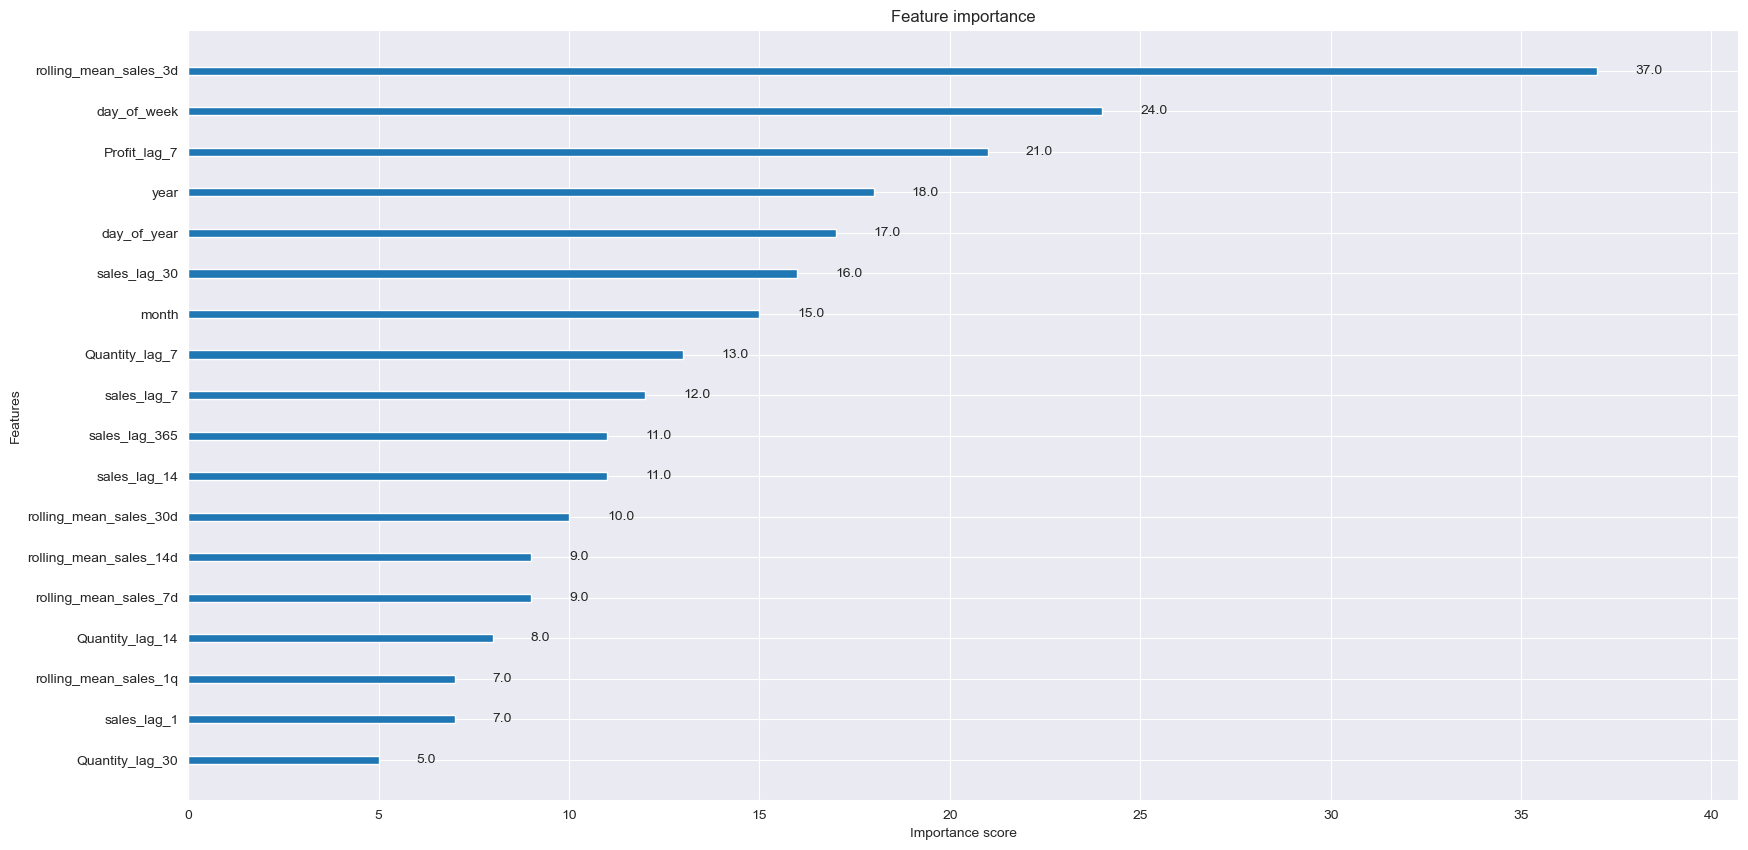

In [196]:
from xgboost import plot_importance
# plt.figure(figsize=(12,6))
plot_importance(best_model)
plt.show()


In [197]:
fig = plot_forecast(dates_test,y_test,preds_xgb,model_name='XGB')
fig.show()
fig.write_image(config['dir']['artifacts_dir']+'/XGBoost.png')

# Final report

In [205]:
final_report = pd.DataFrame({
    'Model': ['SARIMAX', 'ARIMA',' Prophet','XGBoost','Random Forest'],
    'mse': [mse_sarimax,mse_arima,mse_prophet,mse_xgb,mse_rf],
    'RMSE': [rmse_sarimax,rmse_arima,rmse_prophet,rmse_xgb,rmse_rf],
    'R2_Score': [r2_sarimax,r2_arima,r2_prophet,r2_xgb,r2_rf]
})

In [206]:
final_report

,Model,mse,RMSE,R2_Score
0,SARIMAX,2.329351e+06,1526.221001,0.539596
1,ARIMA,4.456052e+07,6675.367011,0.293736
2,Prophet,2.000564e+06,1414.412953,0.489153
3,XGBoost,3.351253e+05,578.900042,0.933761
4,Random Forest,2.185040e+06,1478.188039,0.568119


In [207]:
fig = go.Figure(data=[
    go.Bar(
        x=final_report['Model'],
        y=final_report['R2_Score'],
        text=final_report['R2_Score'].apply(lambda x: f'{x:.2f}'),
        textposition='outside',
        marker_color=['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3']
    )
])

fig.update_layout(
    title='Best Model',
    title_font=dict(size=20),
    xaxis_title='Model',
    yaxis_title='R2 Score (%)',
    plot_bgcolor='white',
    showlegend=False,
    height=600,
    width=1500
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()
fig.write_image(config['dir']['artifacts_dir']+'/comparing_models.png')